Lab | Making predictions with logistic regression 

Reading data into a Pandas dataframe. 
Analyze extracted features and transform them. 
Encoding some categorical variables, or scale numerical variables. 
Creating a query to get the list films rental rate, rental_duration, length, category_id and film rating 
Film rating would be the target variable. Creating a logistic regression model to predict this variable from the cleaned data. 
Evaluation of results.

In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
pw = getpass.getpass()

········


Read the data into a Pandas dataframe.

In [2]:
# define a connection object
conn = pymysql.connect(host="localhost",
                       port=3306,      # most often, it's this port
                       user="root",
                       passwd=pw,
                       db="sakila")

In [3]:
query = '''select film.rental_rate, film.rental_duration, film.length, film.replacement_cost, cate.category_id, film.rating 
from sakila.film as film
inner join sakila.film_category as cate using (film_id)
inner join sakila.category as catt using (category_id)
where category_id < 6;'''

data = pd.read_sql_query(query, conn)
data.head()

,rental_rate,rental_duration,length,replacement_cost,category_id,rating
0,0.99,6,113,20.99,1,PG
1,4.99,3,129,17.99,1,R
2,2.99,5,168,11.99,1,NC-17
3,0.99,6,68,25.99,1,NC-17
4,2.99,6,129,15.99,1,G


In [4]:
data['category_id'].value_counts(   )

2    66
1    64
3    60
5    58
4    57
Name: category_id, dtype: int64

In [5]:
data.shape

(305, 6)

In [6]:
data['rating'].value_counts()

PG-13    69
G        63
PG       61
NC-17    59
R        53
Name: rating, dtype: int64

In [7]:
data['rental_duration'].value_counts()

3    66
6    62
7    61
4    60
5    56
Name: rental_duration, dtype: int64

In [8]:
data['rental_rate'].value_counts()

0.99    110
2.99    107
4.99     88
Name: rental_rate, dtype: int64

In [9]:
data['replacement_cost'].value_counts()

12.99    23
29.99    19
27.99    18
14.99    18
28.99    17
13.99    17
16.99    16
22.99    16
21.99    15
19.99    14
23.99    14
26.99    14
18.99    14
24.99    13
11.99    13
10.99    13
17.99    12
25.99    11
20.99    10
15.99     9
9.99      9
Name: replacement_cost, dtype: int64

In [10]:
data.dtypes

rental_rate         float64
rental_duration       int64
length                int64
replacement_cost    float64
category_id           int64
rating               object
dtype: object

In [11]:
data['length'].value_counts()

85     8
84     6
53     6
185    5
142    5
112    5
102    5
92     5
52     5
143    5
69     4
152    4
58     4
103    4
108    4
57     4
135    4
139    4
115    4
176    4
148    3
184    3
126    3
132    3
79     3
78     3
89     3
136    3
74     3
122    3
      ..
56     1
181    1
157    1
158    1
162    1
180    1
76     1
71     1
88     1
105    1
111    1
96     1
116    1
117    1
93     1
118    1
123    1
124    1
87     1
169    1
86     1
128    1
81     1
131    1
134    1
170    1
164    1
75     1
137    1
165    1
Name: length, Length: 131, dtype: int64

In [12]:
data.isna().sum()

rental_rate         0
rental_duration     0
length              0
replacement_cost    0
category_id         0
rating              0
dtype: int64

In [13]:
data['category_id'] = data['category_id'].astype('object')

In [14]:
data['rental_rate'] = data['rental_rate'].astype('object')

In [15]:
data['rental_duration'] = data['rental_duration'].astype('object')

In [16]:
data['rating'] = data['rating'].astype('object')

In [17]:
data['length'] = data['length'].astype('float')

In [18]:
data.dtypes

rental_rate          object
rental_duration      object
length              float64
replacement_cost    float64
category_id          object
rating               object
dtype: object

In [19]:
data['rating'].value_counts()

PG-13    69
G        63
PG       61
NC-17    59
R        53
Name: rating, dtype: int64

In [20]:
def cleanOperation(x):
    if 'PG-13' in x:
        return "PG"
    elif x == 'G':
        return "G"
    elif 'PG' in x:
        return 'PGG'
    elif 'NC-17' in x:
        return 'NC'
    elif 'R' in x:
        return 'R'
    else:
        return 'unknown'

In [21]:
data['rating'] = list(map(cleanOperation, data['rating']))

In [22]:
data['rating'].value_counts()

PG     69
G      63
PGG    61
NC     59
R      53
Name: rating, dtype: int64

In [23]:
data.describe()

,length,replacement_cost
count,305.000000,305.000000
mean,111.937705,20.232623
std,40.651350,6.171892
min,46.000000,9.990000
25%,79.000000,14.990000
50%,109.000000,19.990000
75%,144.000000,25.990000
max,185.000000,29.990000


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

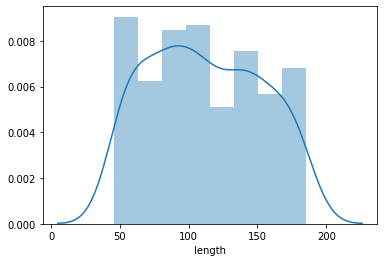

In [25]:
sns.distplot(data['length'])
plt.show()


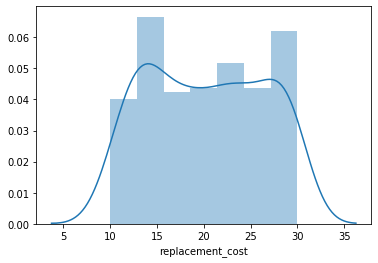

In [26]:
sns.distplot(data['replacement_cost'])
plt.show()


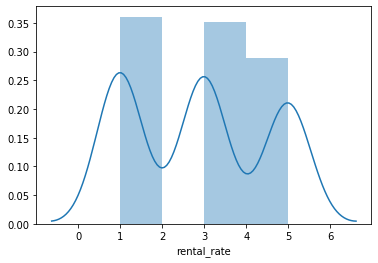

In [27]:
sns.distplot(data['rental_rate'])
plt.show()

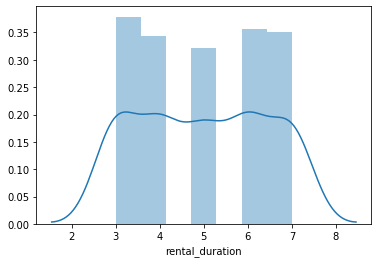

In [28]:
sns.distplot(data['rental_duration'])
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

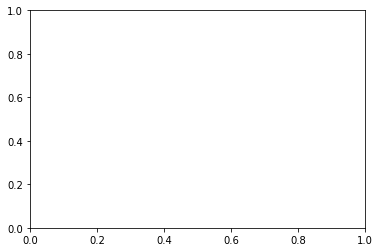

In [30]:
sns.distplot(data['rating'])
plt.show()

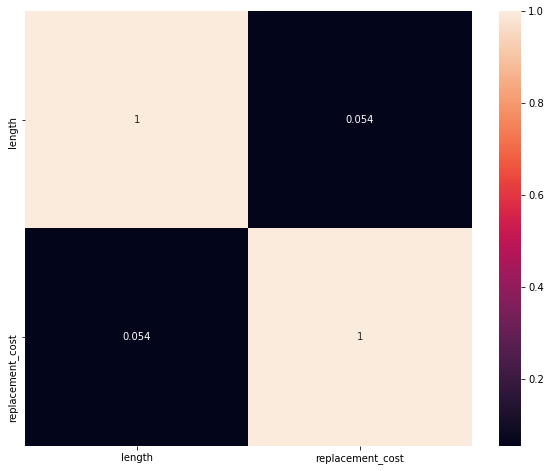

In [31]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [32]:
from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import StandardScaler
import numpy as np
X = data.select_dtypes(include = np.number)

# Normalizing data
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)

In [33]:
x.head()

,0,1
0,0.983182,0.182628
1,0.990415,0.138121
2,0.997463,0.071188
3,0.934098,0.357018
4,0.992405,0.123012


In [34]:
data.head()

,rental_rate,rental_duration,length,replacement_cost,category_id,rating
0,0.99,6,113.0,20.99,1,PGG
1,4.99,3,129.0,17.99,1,R
2,2.99,5,168.0,11.99,1,NC
3,0.99,6,68.0,25.99,1,NC
4,2.99,6,129.0,15.99,1,G


In [35]:
cat = data.select_dtypes(include = np.object)
cat = cat.drop(['rating'], axis=1)
categorical = pd.get_dummies(cat, columns=['rental_rate', 'rental_duration', 'category_id'])

In [37]:
y = data['rating']
X = np.concatenate((x, categorical), axis=1)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [39]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [40]:
classification.score(X_test, y_test)

0.1956521739130435

In [41]:
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.1956521739130435

In [42]:
pd.Series(predictions).value_counts()

PG     29
PGG    23
R      19
G      16
NC      5
dtype: int64

In [43]:
y_test.value_counts()

NC     21
PGG    19
R      19
G      18
PG     15
Name: rating, dtype: int64

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[2, 1, 7, 5, 3],
       [8, 1, 5, 3, 4],
       [1, 1, 5, 5, 3],
       [2, 0, 6, 6, 5],
       [3, 2, 6, 4, 4]], dtype=int64)

In [ ]:
# from sklearn import metrics
# import matplotlib.pyplot as plt

# y_pred_proba = classification.predict_proba(X_test)[::,1]
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
# auc = metrics.roc_auc_score(y_test, y_pred_proba)
# plt.plot(fpr,tpr)

In [45]:
classification.predict_proba(X_test)

array([[0.34410295, 0.18725895, 0.12811077, 0.18306864, 0.1574587 ],
       [0.31206307, 0.12873885, 0.21647901, 0.26278359, 0.07993548],
       [0.38184562, 0.13207752, 0.21478073, 0.12816866, 0.14312747],
       [0.267774  , 0.12255561, 0.17494221, 0.0829013 , 0.35182688],
       [0.17232856, 0.12866947, 0.25377659, 0.38883767, 0.0563877 ],
       [0.18224306, 0.12096707, 0.35081099, 0.20281649, 0.14316239],
       [0.27733148, 0.12552194, 0.17029008, 0.08445407, 0.34240243],
       [0.29516916, 0.15643725, 0.16987405, 0.19277457, 0.18574497],
       [0.15703728, 0.1739989 , 0.2321314 , 0.26526058, 0.17157183],
       [0.08170892, 0.13851542, 0.29902117, 0.33475664, 0.14599786],
       [0.17653076, 0.17434255, 0.3185951 , 0.18948471, 0.14104688],
       [0.20523701, 0.19587463, 0.18515645, 0.11465963, 0.29907229],
       [0.15401617, 0.25671187, 0.20053345, 0.34268826, 0.04605025],
       [0.14077688, 0.31025328, 0.3179041 , 0.11626648, 0.11479926],
       [0.17557851, 0.2568917 , 0.

In [46]:
classification.predict_proba(X_test)[::,0]

array([0.34410295, 0.31206307, 0.38184562, 0.267774  , 0.17232856,
       0.18224306, 0.27733148, 0.29516916, 0.15703728, 0.08170892,
       0.17653076, 0.20523701, 0.15401617, 0.14077688, 0.17557851,
       0.21132126, 0.33422641, 0.08177691, 0.08121267, 0.31960263,
       0.27492098, 0.08531927, 0.18954604, 0.17063088, 0.20992095,
       0.39493398, 0.16406241, 0.07990828, 0.31324993, 0.33215507,
       0.12697237, 0.18280515, 0.17502601, 0.17766801, 0.18555588,
       0.07520568, 0.16429267, 0.25502775, 0.35288715, 0.25085283,
       0.16814633, 0.16631251, 0.18797243, 0.14019718, 0.14663857,
       0.14801365, 0.14880106, 0.13956054, 0.14608721, 0.17007125,
       0.17598239, 0.16127585, 0.13136522, 0.0768234 , 0.29255919,
       0.24860889, 0.25384038, 0.13552865, 0.27081586, 0.15536631,
       0.14950535, 0.25652005, 0.43957343, 0.14825429, 0.14781622,
       0.22100965, 0.14197334, 0.38305574, 0.21534766, 0.2789882 ,
       0.1515679 , 0.13047906, 0.16476278, 0.16445039, 0.25716